<a href="https://colab.research.google.com/github/jhcheng/DTSA5509/blob/main/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import os
default_n_threads = 8
os.environ['OPENBLAS_NUM_THREADS'] = f"{default_n_threads}"
os.environ['MKL_NUM_THREADS'] = f"{default_n_threads}"
os.environ['OMP_NUM_THREADS'] = f"{default_n_threads}"


In [3]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

In [5]:
# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [6]:
# metadata
print(bank_marketing.metadata)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [7]:
# variable information
print(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

In [8]:
bank_marketing.data.original

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [9]:
_y = np.where(y == 'yes', 1, 0)

In [10]:
_y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [11]:
X.isna().sum(axis = 0)

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [12]:
job_array, job_index = X['job'].factorize()
marital_array, marital_index = X['marital'].factorize()
education_array, education_index = X['education'].factorize()
contact_array, contact_index = X['contact'].factorize()
poutcome_array, poutcome_index = X['poutcome'].factorize()

In [13]:
X.loc[:,'job'] = job_array
X.loc[:,'marital'] = marital_array
X.loc[:,'education'] = education_array
X.loc[:,'contact'] = contact_array
X.loc[:,'poutcome'] = poutcome_array

In [14]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,0,0,0,no,2143,yes,no,-1,5,may,261,1,-1,0,-1
1,44,1,1,1,no,29,yes,no,-1,5,may,151,1,-1,0,-1
2,33,2,0,1,no,2,yes,yes,-1,5,may,76,1,-1,0,-1
3,47,3,0,-1,no,1506,yes,no,-1,5,may,92,1,-1,0,-1
4,33,-1,1,-1,no,1,no,no,-1,5,may,198,1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,no,825,no,no,0,17,nov,977,3,-1,0,-1
45207,71,4,2,2,no,1729,no,no,0,17,nov,456,2,-1,0,-1
45208,72,4,0,1,no,5715,no,no,0,17,nov,1127,5,184,3,2
45209,57,3,0,1,no,668,no,no,1,17,nov,508,4,-1,0,-1


In [15]:
X.loc[:,'default'] = np.where(X['default'] == 'yes', 1, 0)
X.loc[:,'housing'] = np.where(X['housing'] == 'yes', 1, 0)
X.loc[:,'loan'] = np.where(X['loan'] == 'yes', 1, 0)

In [16]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,0,0,0,0,2143,1,0,-1,5,may,261,1,-1,0,-1
1,44,1,1,1,0,29,1,0,-1,5,may,151,1,-1,0,-1
2,33,2,0,1,0,2,1,1,-1,5,may,76,1,-1,0,-1
3,47,3,0,-1,0,1506,1,0,-1,5,may,92,1,-1,0,-1
4,33,-1,1,-1,0,1,0,0,-1,5,may,198,1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,0,17,nov,977,3,-1,0,-1
45207,71,4,2,2,0,1729,0,0,0,17,nov,456,2,-1,0,-1
45208,72,4,0,1,0,5715,0,0,0,17,nov,1127,5,184,3,2
45209,57,3,0,1,0,668,0,0,1,17,nov,508,4,-1,0,-1


In [17]:
X['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
X.loc[:,'month'] = pd.to_datetime(X['month'], format='%b').dt.month

In [19]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,0,0,0,0,2143,1,0,-1,5,5,261,1,-1,0,-1
1,44,1,1,1,0,29,1,0,-1,5,5,151,1,-1,0,-1
2,33,2,0,1,0,2,1,1,-1,5,5,76,1,-1,0,-1
3,47,3,0,-1,0,1506,1,0,-1,5,5,92,1,-1,0,-1
4,33,-1,1,-1,0,1,0,0,-1,5,5,198,1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,0,17,11,977,3,-1,0,-1
45207,71,4,2,2,0,1729,0,0,0,17,11,456,2,-1,0,-1
45208,72,4,0,1,0,5715,0,0,0,17,11,1127,5,184,3,2
45209,57,3,0,1,0,668,0,0,1,17,11,508,4,-1,0,-1


In [20]:
X.duplicated().sum()

0

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, _y.ravel(), test_size=0.25, random_state=16)

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


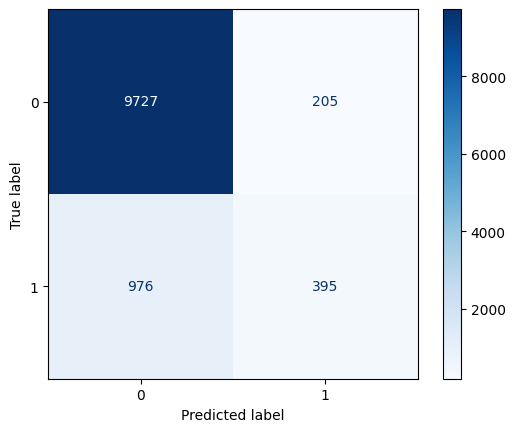

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

In [24]:
np.sum(y_pred == y_test)/len(y_test)

0.8955144651862338

<Axes: >

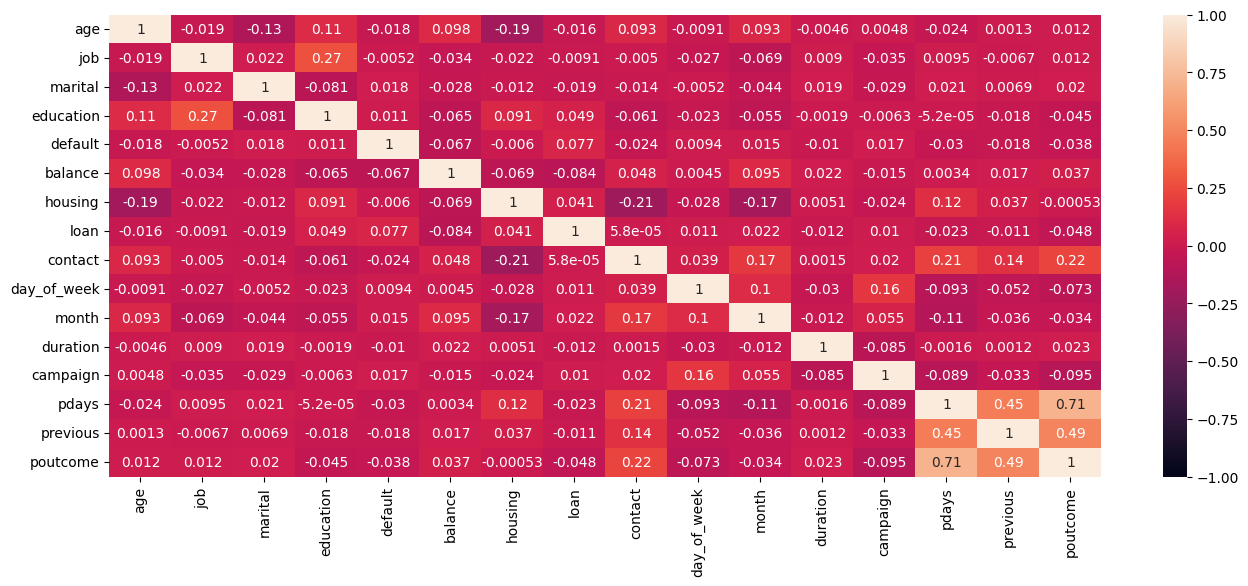

In [25]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)

In [26]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV

In [27]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, max_features=10, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
]

#parameters = [
#    {'n_neighbors': [3, 5, 7, 9]},
#    {'C': [0.025, 0.05, 0.1, 1]},
#    {'gamma': [0.01, 0.1, 1, 2, 5, 10, 20], 'C': [0.05, 0.1, 1, 10, 20]},
#    {'max_depth': np.arange(3, 10)},
#    {'max_depth': np.arange(3, 10), 'n_estimators': np.arange(2, 11), 'max_features': np.arange(1, 6)},
#    {'n_estimators': np.arange(3, 17), 'learning_rate': [0.01, 1, 10]}
#]

parameters = [
    {'n_neighbors': [3, 5, 7, 9]},
    {'C': [0.025]},
    {'gamma': [1], 'C': [0.1]},
    {'max_depth': np.arange(3, 10)},
    {'max_depth': np.arange(3, 10), 'n_estimators': np.arange(2, 11), 'max_features': np.arange(1, 6)},
    {'n_estimators': np.arange(3, 17), 'learning_rate': [0.01, 1, 10]}
]

In [31]:
models = []
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    %timeit clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{:<18s}: {:.10f}'.format(name, score))
    models.append(clf)


83.5 ms ± 739 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Nearest Neighbors : 0.8885251703
11.7 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Linear SVM        : 0.8841900380
2min 23s ± 2.74 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
RBF SVM           : 0.8796779616
176 ms ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Decision Tree     : 0.8983455720
4.05 s ± 424 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random Forest     : 0.8987879324
1.31 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
AdaBoost          : 0.8936565514


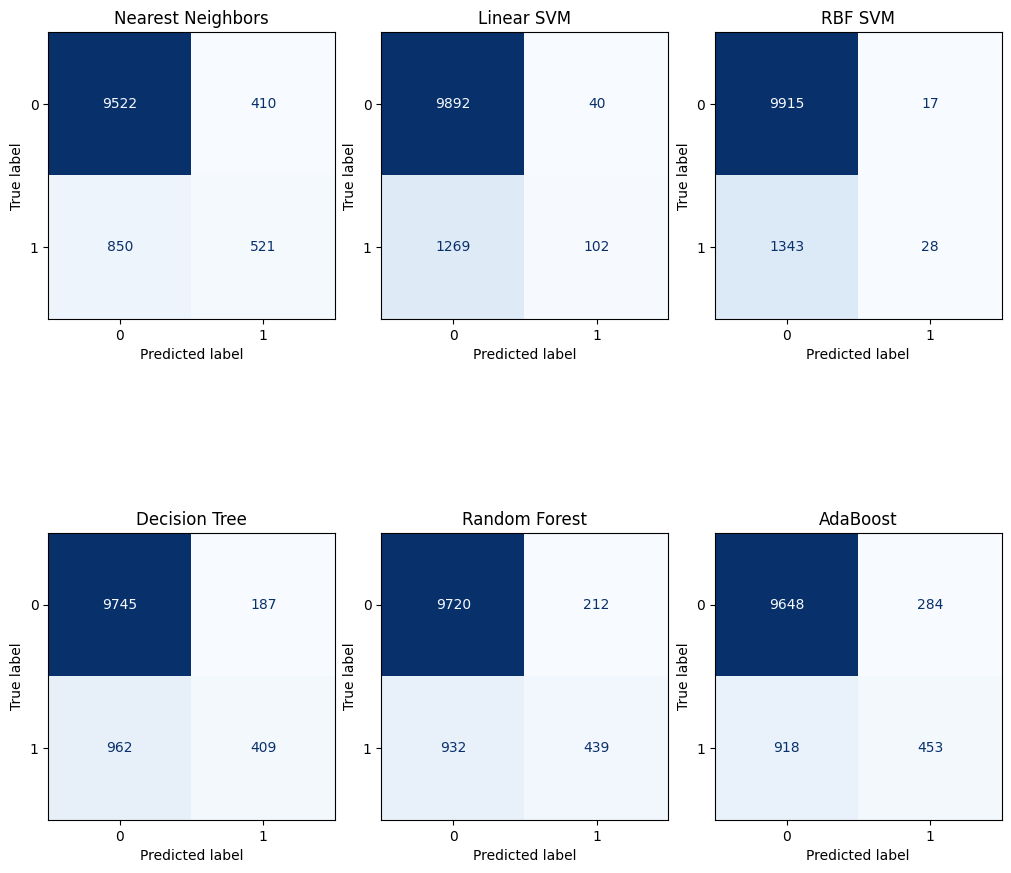

In [38]:
_, axs = plt.subplots(2, 3, figsize=(10, 10), layout="constrained")

i = 0
axs_array = axs.flat
for name, clf in zip(names, models):
    y_pred = clf.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, ax=axs_array[i], colorbar=False)
    disp.ax_.set_title(name)
    i += 1

plt.show()
